<center>
    
# OilyGiant

**O objetivo deste projeto é encontrar os melhores lugares para o desenvolvimento de novos poços de petróleo.**

Nossos arquivos possuem dados sobre amostras de petróleo de três regiões. Com estes dados, construiremos um modelo de regressão linear, que nos ajudará a predizer o volume de reservas em novos poços e, portanto, a escolher a região com a margem de lucro mais alta. Utilizaremos a técnica de Bootstrapping para analisar lucro potencial e riscos.


**Informações extras:**
Ao explorar a região, um estudo de 500 pontos é realizado e os melhores 200 pontos são selecionados para calcular o lucro.
O orçamento para o desenvolvimento de 200 poços de petróleo é de 100 milhões de dólares.
Um barril de petróleo bruto traz 4.5 dólares de receita. A receita de uma unidade de produto é 4.500 dólares (o volume de reservas está em milhares de barris).

Após avaliação dos riscos, seguiremos apenas com as regiões que tiverem um risco de perdas inferior a 2.5%. 
Dentre as regiões que se enquadrarem neste critério, selecionaremos aquela com o lucro médio mais alto.

## IMPORTAÇÃO DAS BIBLIOTECAS E MÓDULOS NECESSÁRIOS

In [1]:
# bibliotecas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# módulos:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

## PRÉ-ANÁLISE DOS DADOS

### Carregamento dos dados e checagem inicial

**Nesta etapa iremos carregar os dados, pré analisá-los e alterá-los, se necessário. 
Iremos focar no padrão dos nomes das colunas, os tipos de dados, dados ausentes e dados repetidos.**

In [2]:
# Lendo os DataFrames
df_geo_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_geo_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_geo_2 = pd.read_csv('/datasets/geo_data_2.csv')

print(df_geo_0.head(3))
print()
print(df_geo_1.head(3))
print()
print(df_geo_2.head(3))

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647

      id         f0        f1        f2     product
0  kBEdx -15.001348 -8.276000 -0.005876    3.179103
1  62mP7  14.272088 -3.475083  0.999183   26.953261
2  vyE1P   6.263187 -5.948386  5.001160  134.766305

      id        f0        f1        f2    product
0  fwXo0 -1.146987  0.963328 -0.828965  27.758673
1  WJtFt  0.262778  0.269839 -2.530187  56.069697
2  ovLUW  0.194587  0.289035 -5.586433  62.871910


In [3]:
# Imprimindo as informações gerais dos DataFrames
print(df_geo_0.info())
print()
print(df_geo_1.info())
print()
print(df_geo_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column

In [4]:
# Checagem de dados duplicados
print(df_geo_0.duplicated().sum())
print(df_geo_1.duplicated().sum())
print(df_geo_2.duplicated().sum())

0
0
0


Cada um dos DataFrames possui 100.000 linhas com informações e, conforme podemos observar, não foi necessário realizar um pré-processamento dos dados, pois os 3 DataFrames que utilizaremos estão com nomes padronizados, com tipos de dados corretos e não possuem valores ausentes ou linhas com informações duplicadas.

Portanto, seguiremos para a próxima etapa.

### Visualização dos dados

**Nesta etapa iremos traçar histogramas para cada região para analisarmos os padrões da distribuição dos dados**

In [5]:
# Criando uma função para traçar os histogramas de cada região
def region_histogram(df):
    columns = ["f0","f1","f2","product"]
    print()
    print()
    plt.subplots(figsize = (20,5))
    for i,column in enumerate(columns):    
        grafico=sns.histplot(data=df, x=column, bins=50,ax=plt.subplot(1, len(columns), i + 1))
        plt.xticks(rotation = 45)

#### Histograma da Região 0

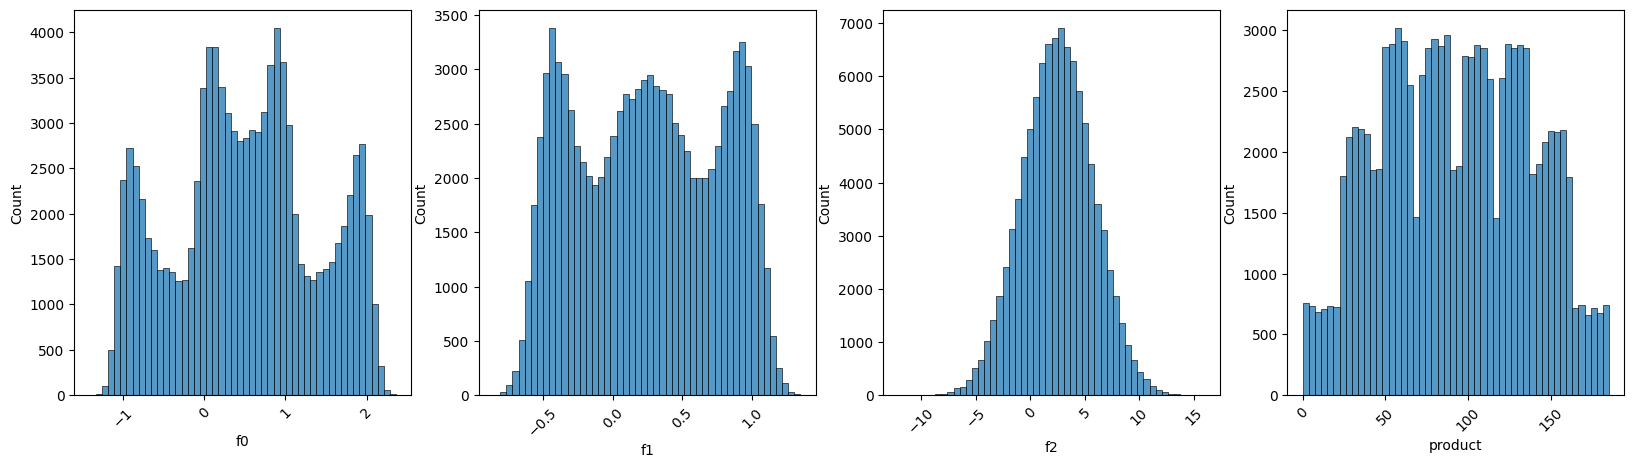

In [6]:
region_histogram(df_geo_0)

**Distribuições:**

**f0:** A distribuição de f0 é multimodal, com vários picos e vales. Isso sugere que f0 pode ter várias subpopulações no conjunto de dados.  
**f1:** A distribuição de f1 também é multimodal, apresentando múltiplos picos. Isso pode indicar a presença de subpopulações distintas.  
**f2:** A distribuição de f2 é Normal. Essa distribuição sugere que f2 é uma característica contínua e bem comportada, com a maioria dos valores concentrados em torno da média e poucos valores extremos.  
**product:** O histograma de product mostra uma distribuição multimodal com vários picos, indicando que o resultado também pode ter subpopulações. Essa distribuição pode refletir diferentes níveis de produção ou diferentes condições geológicas.  

#### Histograma da Região 1

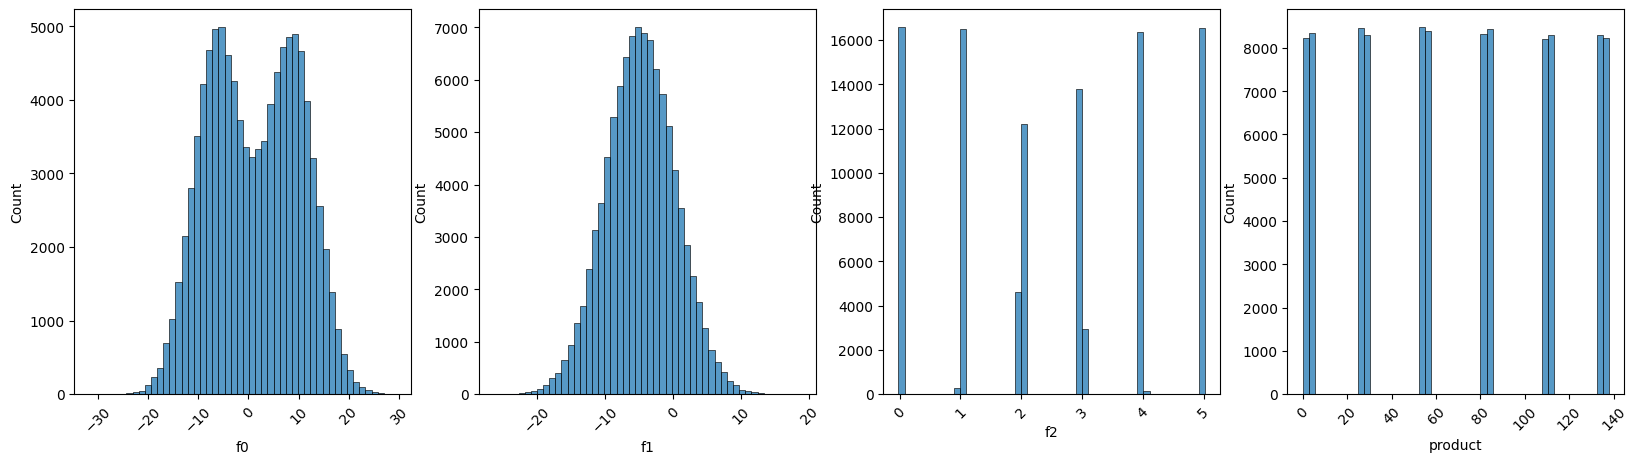

In [7]:
region_histogram(df_geo_1)

**Distribuições:**

**f0:** A distribuição de f0 é bimodal, sugerindo que existem duas subpopulações distintas nos dados.  
**f1:** A distribuição de f1 é Normal.  
**f2:** A distribuição de f2 apresenta vários picos, com valores específicos sendo muito mais frequentes do que outros. Porém, sabemos que ela não é uma característica categórica e a transformação pode ser útil.  
**product:** A distribuição de product também apresenta vários picos. 

#### Histograma da Região 2

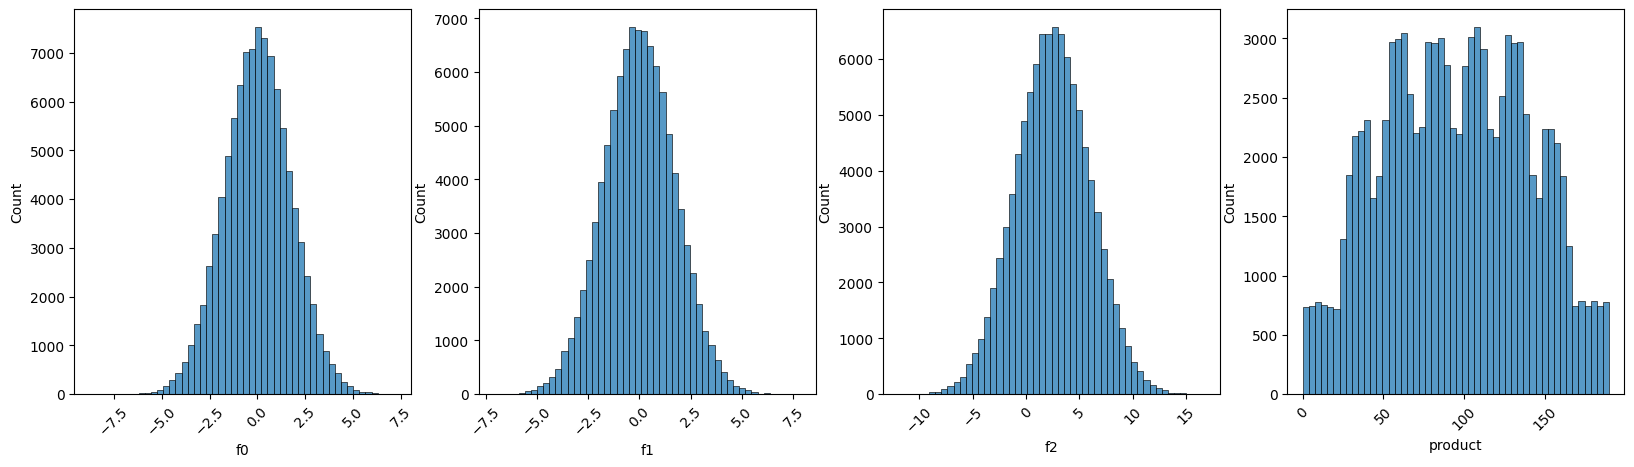

In [8]:
region_histogram(df_geo_2)

**Distribuições:**

**f0:** A distribuição de f0 é normal, centrada em torno de 0, com um formato simétrico.  
**f1:** A distribuição de f1 também é normal, centrada em torno de 0, com um formato simétrico.   
**f2:** A distribuição de f2 segue um padrão Normal, semelhante das demais.  
**Product:** A distribuição do produto mostra uma variação considerável, com vários picos e vales, o que pode sugerir a presença de subpopulações.

Após analisar os histogramas, observamos que normalizar ou padronizar os dados com StandardScaler() pode ser benéfico antes de treinar os modelos. Portanto, antes de treinar o modelo, faremos a padronização dos dados.

## MODELOS DOS DATAFRAMES

### DataFrame Região 0

#### Remoção de colunas desnecessárias

A coluna 'id' não é necessária e por conter strings, deve ser removida 

In [9]:
# Criando uma função para remoção de colunas desnecessárias
def clean (df, target_column):
    df = df.drop([target_column], axis = 1)
    return df

# Chamando a função para o df_geo_0
df_geo_0 = clean(df_geo_0, 'id')

print(df_geo_0.head(3))

         f0        f1        f2     product
0  0.705745 -0.497823  1.221170  105.280062
1  1.334711 -0.340164  4.365080   73.037750
2  1.022732  0.151990  1.419926   85.265647


#### Divisão dos dados

Nesta etapa faremos a divisão dos dados do DataFrame em um conjunto de treinamento e um conjunto de validação em uma proporção de 75:25

In [10]:
# Criando uma função para divisão dos dados
def split_data(df, target_column, test_size=0.25, random_state = 14):
    target = df[target_column]
    features = df.drop([target_column], axis = 1)
    
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size = test_size, random_state = random_state)
    
    return features_train, features_valid, target_train, target_valid

# Chamando a função para o df_geo_0
features_train_0, features_valid_0, target_train_0, target_valid_0 = split_data(df_geo_0, 'product')

print(features_train_0.shape)
print(target_train_0.shape)
print(features_valid_0.shape)
print(target_valid_0.shape)

(75000, 3)
(75000,)
(25000, 3)
(25000,)


#### Padronização dos dados

Nesta etapa faremos a transformação dos dados para escalas padronizadas, evitando assim que os nossos modelos os interpretem de forma equivocada.

In [11]:
# Criando uma função para padronização das colunas usando StandardScaler
def standardization(features_train, features_valid):
    scaler = StandardScaler()
    features_train = scaler.fit_transform(features_train)
    features_valid = scaler.transform(features_valid)
    return features_train, features_valid

# Chamando a função para padronização do df_geo_0
features_train_0, features_valid_0 = standardization(features_train_0, features_valid_0)

# Imprimir os resultados para verificação
print(features_train_0)
print()
print(features_valid_0)

[[-0.33935668 -0.89529587 -0.31500039]
 [ 0.72064997 -0.01690248  0.34237399]
 [ 0.70325366 -1.64643652 -0.26678233]
 ...
 [-0.31220071  1.07821574 -1.85600974]
 [-0.10594498 -0.58344306  1.31032786]
 [-0.44098936 -0.3403603   1.1154964 ]]

[[-0.42546756  0.2263467  -0.97012462]
 [-1.42751179  0.77310129  0.51085334]
 [-1.50671968  0.90018654 -0.30972603]
 ...
 [ 0.13934514 -0.91561321 -0.36979932]
 [ 1.77259251  0.55000558  0.47309492]
 [-0.35932828 -0.97127706  1.21947256]]


#### Treinamento do modelo e predição de valores

Nesta etapa realizaremos o treinamento do modelo e faremos as predições para o conjunto de validação

In [12]:
# Criando uma função para treinar o modelo e retornar a predição
def model_predict(features_train, target_train, features_valid):
    model = LinearRegression()
    model.fit(features_train, target_train)

    predicted_valid = model.predict(features_valid)
    return predicted_valid

# Chamando a função para o df_geo_0
predicted_valid_0 = model_predict(features_train_0, target_train_0, features_valid_0)

diff_0 = predicted_valid_0.mean() - target_valid_0.mean()

print('Volume médio previsto para a região 0 =', predicted_valid_0.mean())
print()
print('Volume médio real para a região 0 =', target_valid_0.mean())
print()
print('Diferença entre média real e média prevista:', diff_0)

Volume médio previsto para a região 0 = 92.56331572920227

Volume médio real para a região 0 = 92.44175782645175

Diferença entre média real e média prevista: 0.12155790275052425


#### Cálculo da raíz do erro quadrado médio

In [13]:
# criando uma função para calcular a raíz do erro quadrado médio
def reqm(target_valid, predicted_valid):
    reqm = mean_squared_error(target_valid, predicted_valid, squared=False)
    return reqm

# Chamando a função para o df_geo_0
reqm_0 = reqm(target_valid_0, predicted_valid_0)
print('reqm do modelo da região 0 =', reqm_0)

reqm do modelo da região 0 = 37.64172219212394


#### Análise dos resultados

* **Volume médio previsto para a região 0:** 92.5633
* **Volume médio real para a região 0:** 92.4418
* **Diferença entre média real e prevista para a região 0:** 0.1215
* **REQM do modelo da região 0:** 37.6417



**Diferença entre as Médias:**
A diferença entre o volume médio real e o volume médio previsto é muito pequena (0.1215). Isso indica que, em média, o modelo está bastante próximo do valor real, o que é positivo.


**REQM:**
Se o volume médio real é de 92.4418, um REQM de 37.6417 é muito grande em relação a este valor, representando 40,72% deste,  o que indica um erro relativo significativo. Isso sugere que o modelo pode estar cometendo erros importantes nas previsões individuais, mesmo que a média das previsões seja próxima da média real.

### DataFrame Região 1

#### Remoção de colunas desnecessárias

In [14]:
# Chamando a função para remoção de colunas desnecessárias
df_geo_1 = clean(df_geo_1, 'id')

print(df_geo_1)

              f0         f1        f2     product
0     -15.001348  -8.276000 -0.005876    3.179103
1      14.272088  -3.475083  0.999183   26.953261
2       6.263187  -5.948386  5.001160  134.766305
3     -13.081196 -11.506057  4.999415  137.945408
4      12.702195  -8.147433  5.004363  134.766305
...          ...        ...       ...         ...
99995   9.535637  -6.878139  1.998296   53.906522
99996 -10.160631 -12.558096  5.005581  137.945408
99997  -7.378891  -3.084104  4.998651  137.945408
99998   0.665714  -6.152593  1.000146   30.132364
99999  -3.426139  -7.794274 -0.003299    3.179103

[100000 rows x 4 columns]


#### Divisão dos dados

In [15]:
# Chamando a função para divisão dos dados
features_train_1, features_valid_1, target_train_1, target_valid_1 = split_data(df_geo_1, 'product')

print(features_train_1.shape)
print(target_train_1.shape)
print(features_valid_1.shape)
print(target_valid_1.shape)

(75000, 3)
(75000,)
(25000, 3)
(25000,)


#### Padronização dos dados

In [16]:
# Chamando a função para padronização dos dados
features_train_1, features_valid_1 = standardization(features_train_1, features_valid_1)

# Imprimir os resultados para verificação
print(features_train_1)
print()
print(features_valid_1)

[[-0.77186033 -0.8104102  -1.46344845]
 [-1.64139535  0.33147337 -1.46251823]
 [ 1.40804429  0.82144991 -1.46226735]
 ...
 [-0.44790644  1.61951741 -1.45440443]
 [ 1.46510578  0.59871055  0.88096384]
 [ 0.0404159   0.00939196  1.47095269]]

[[ 0.65180102  0.05541995  1.46452719]
 [-0.65609667  0.77312081  0.87776405]
 [-0.37119437  0.18425662  0.88683481]
 ...
 [ 1.27259819 -0.76184676 -0.87330901]
 [-0.98180996 -1.10240513 -0.87198871]
 [-1.17703875 -0.16253508  0.29589075]]


#### Treinamento do modelo e predição de valores

In [17]:
# Chamando a função para predição dos valores
predicted_valid_1 = model_predict(features_train_1, target_train_1, features_valid_1)

diff_1 = predicted_valid_1.mean() - target_valid_1.mean()


print('Volume médio previsto para a região 1 =', predicted_valid_1.mean())
print()
print('Volume médio real para a região 1 =', target_valid_1.mean())
print()
print('Diferença entre média real e média prevista:', diff_1)

Volume médio previsto para a região 1 = 68.89452655451875

Volume médio real para a região 1 = 68.89534939351084

Diferença entre média real e média prevista: -0.0008228389920930113


#### Cálculo da raíz do erro quadrado médio

In [18]:
# Chamando a função que calcula a raíz do erro quadrado médio
reqm_1 = reqm(target_valid_1, predicted_valid_1)

print('reqm do modelo da região 1 =', reqm_1)

reqm do modelo da região 1 = 0.8925967602874494


#### Análise dos resultados

* **Volume médio previsto para a região 1:** 68.8945
* **Volume médio real para a região 1:** 68.8953
* **Diferença entre média real e prevista para a região 1:** -0.0008
* **REQM do modelo da região 1:** 0.8926


**Diferença entre as Médias:**
A diferença entre o volume médio real e o volume médio previsto é praticamente insignificante (0.0008). Isso indica que, em média, o modelo está muito preciso e muito próximo do valor real, o que é positivo.


**REQM:**
Se o volume médio real é de 68.8953, um REQM de 0.8926 é bem aceitável, representando apenas 1,3% deste.  
Este REQM indica que as previsões individuais do modelo são bem precisas, com um erro médio de menos de 1, o que é excelente considerando a escala dos valores.


### DataFrame Região 2

#### Remoção de colunas desnecessárias

In [19]:
# Chamando a função para remoção de colunas desnecessárias
df_geo_2 = clean(df_geo_2, 'id')

print(df_geo_2)

             f0        f1        f2     product
0     -1.146987  0.963328 -0.828965   27.758673
1      0.262778  0.269839 -2.530187   56.069697
2      0.194587  0.289035 -5.586433   62.871910
3      2.236060 -0.553760  0.930038  114.572842
4     -0.515993  1.716266  5.899011  149.600746
...         ...       ...       ...         ...
99995 -1.777037  1.125220  6.263374  172.327046
99996 -1.261523 -0.894828  2.524545  138.748846
99997 -1.199934 -2.957637  5.219411  157.080080
99998 -2.419896  2.417221 -5.548444   51.795253
99999 -2.551421 -2.025625  6.090891  102.775767

[100000 rows x 4 columns]


#### Divisão dos dados

In [20]:
# Chamando a função para divisão dos dados
features_train_2, features_valid_2, target_train_2, target_valid_2 = split_data(df_geo_2, 'product')

print(features_train_2.shape)
print(target_train_2.shape)
print(features_valid_2.shape)
print(target_valid_2.shape)

(75000, 3)
(75000,)
(25000, 3)
(25000,)


#### Padronização dos dados

In [21]:
# Chamando a função para padronização dos dados
features_train_2, features_valid_2 = standardization(features_train_2, features_valid_2)

# Imprimir os resultados para verificação
print(features_train_2)
print()
print(features_valid_2)

[[ 0.16480696 -0.79253507  2.13100605]
 [-0.03540357 -0.2660114  -0.59022395]
 [-0.65024629  1.01632028 -0.64191254]
 ...
 [-0.50998991  0.49615572  0.76638058]
 [ 0.25901302  0.58506025 -0.05433839]
 [-0.74276472 -0.58450664  0.50627248]]

[[ 1.34137828  0.57666841 -0.3301181 ]
 [-0.87474829 -0.32988573  0.03956245]
 [-0.92816295 -0.01401015  0.28281811]
 ...
 [ 0.66397935 -0.50766686  0.23199241]
 [-0.32805322 -1.15826972  1.58552851]
 [-0.54424805  1.09077129 -1.20186032]]


#### Treinamento do modelo e predição de valores

In [22]:
# Chamando a função para predição dos valores
predicted_valid_2 = model_predict(features_train_2, target_train_2, features_valid_2)

diff_2 = predicted_valid_2.mean() - target_valid_2.mean()

print('Volume médio previsto para a região 2 =', predicted_valid_2.mean())
print()
print('Volume médio real para a região 2 =', target_valid_2.mean())
print()
print('Diferença entre média real e média prevista:', diff_2)

Volume médio previsto para a região 2 = 95.04162515658933

Volume médio real para a região 2 = 95.21832420798346

Diferença entre média real e média prevista: -0.17669905139412379


#### Cálculo da raíz do erro quadrado médio

In [23]:
# Chamando a função que calcula a raíz do erro quadrado médio
reqm_2 = reqm(target_valid_2, predicted_valid_2)

print('reqm do modelo da região 2 =', reqm_2)

reqm do modelo da região 2 = 39.824525086273866


#### Análise dos resultados

* **Volume médio previsto para a região 2:** 95.0416
* **Volume médio real para a região 2:** 95.2183
* **Diferença entre média real e prevista para a região 2:** -0.1767
* **REQM do modelo da região 2:** 39.8245


**Diferença entre as Médias:**
A diferença entre o volume médio real e o volume médio previsto é muito pequena (0.1767). Isso indica que, em média, o modelo tem um bom resultado, próximo do valor real, o que é positivo.


**REQM:**
Se o volume médio real é de 95.2183, um REQM de 39.8245 é muito grande, representando 41,82% do volume médio, o que indica um erro relativo significativo. Isso sugere que o modelo pode estar cometendo erros importantes nas previsões individuais, mesmo que a média das previsões seja próxima da média real.

### Primeiras Análises

**TABELA DE RESULTADOS:**
   
| DataFrame  | Volume Médio Previsto | Volume Médio Real | Diferença | REQM         |
|------------|-----------------------|-------------------|-----------|--------------|
| df_geo_0   | 92.5633               | 92.4418           | 0.1215    | 37.6417      |
| df_geo_1   | 68.8945               | 68.8953           | -0.0008   | 0.8926       |
| df_geo_2   | 95.0416               | 95.2183           | -0.1767   | 39.8245      |
    
<br>

**Diferença entre as Médias:**
A diferença entre o volume médio real e o volume médio previsto foi pequena em todos os modelos. Isso indica que, em relação aos valores médios, todos os modelos apresentaram um resultado satisfatório.  
Porém, ainda assim, o modelo da **região 1 obteve a menor diferença**, indicando que é o mais preciso em prever o valor médio.


**REQM:**
Em relação ao REQM, apenas o modelo da **região 1 apresentou um bom resultado**, pois obteve um erro muito pequeno em relação à escala dos volumes reais, representando apenas 1.3%. Portanto, este modelo é o mais preciso também nas previsões individuais.  
Os outros modelos, **região 0** e **região 2, apresentaram erros muito significativos**, representando 40.72% e 41.82% em relação aos volumes reais.

**Volume Médio Previsto:**
Apesar de apresentar o melhor modelo, a região 1 apresentou o menor valor para os Volumes Médios Real e Previsto.

## CÁLCULO DE LUCRO POTENCIAL

### Criação das variáveis necessárias

In [24]:
petroleum_well_budget = 100000000 # Orçamento para o desenvolvimento de 200 poços de petróleo é 100 milhões de dólares.
unit_income = 4500 # A receita de uma unidade de produto é 4.500 dólares (o volume de reservas está em milhares de barris)
number_wells = 200

### Produção média necessária

In [25]:
average_production_required = petroleum_well_budget/number_wells/unit_income

print(f'A produção média necessária por poço para evitar prejuízos é de {average_production_required:.1f} unidades')

A produção média necessária por poço para evitar prejuízos é de 111.1 unidades


### Primeiras conclusões

Como o investimento é de 100 milhões de dólares para a perfuração de 200 poços de petróleo, cada poço precisa produzir, em média, uma quantidade de unidades equivalente a pelo menos 500 mil dólares para evitar prejuízos. Isso quer dizer que é **necessária uma produção média de 111.1 unidades (ou 111.100 barris) por poço**.

Inicialmente, esta produção média mínima necessária nos traz um problema, pois nenhuma de nossas regiões obteve esta média, como pode ser observado abaixo: 

| DataFrame  | Volume Médio Previsto |
|------------|-----------------------|
| df_geo_0   | 92.5633               |
| df_geo_1   | 68.8945               |
| df_geo_2   | 95.0416               |


Portanto, precisaremos de uma estratégia para avaliarmos os possíveis lucros e prejuízos.  
Iremos estudar 500 pontos por região e selecionar os melhores 200 pontos para calcular o lucro.

## Cálculo do lucro potencial de um conjunto de pontos selecionados

Nesta etapa iremos criar uma função que irá selecionar aleatoriamente 500 pontos. Depois, dentre estes 500 pontos, irá selecionar os 200 pontos com os valores mais altos previstos e calcular as seguintes métricas: volume total, volume médio, receita total e lucro potencial.

Depois iremos chamar essa função para realizar os cálculos para cada uma das regiões estudadas.

In [26]:
# Criando a função para o cálculo das métricas
def top_200_summary(predicted_valid):
    np.random.seed(12345)
    sample_500 = np.random.choice(predicted_valid, size=500, replace=False) # Amostrando 500 pontos aleatórios
    top_200 = sorted(sample_500, reverse=True)[:200] # Selecionando 200 valores mais altos dentre os 500 amostrados
    target_volume_pred = sum(top_200) # Somando os volumes previstos para cada poço dentre os selecionados
    avg_target_vol = target_volume_pred / number_wells # Calculando a média de produção por poço
    group_income = target_volume_pred * unit_income # Multiplicando o volume previsto pela receita de uma unidade
    group_profit =  group_income - petroleum_well_budget # Calculando o lucro previsto de cada região
    print(f'''O volume alvo de reservas previsto para o grupo de postos da região é de {target_volume_pred:.2f}.
O volume médio de produção por poço é de {avg_target_vol:.2f} unidades.
A receita total prevista é de {group_income/1000000:.2f} milhões de dólares.
O lucro previsto é de {group_profit/1000000:.2f} milhões de dólares''')
    return target_volume_pred, avg_target_vol, group_income, group_profit, top_200

### Região 0

In [27]:
# Chamando a função
target_volume_pred_0, avg_target_vol_0, group_income_geo_0, group_profit_0, top_200_0  = top_200_summary(predicted_valid_0)

O volume alvo de reservas previsto para o grupo de postos da região é de 22648.52.
O volume médio de produção por poço é de 113.24 unidades.
A receita total prevista é de 101.92 milhões de dólares.
O lucro previsto é de 1.92 milhões de dólares


### Região 1

In [28]:
target_volume_pred_1, avg_target_vol_1, group_income_geo_1, group_profit_1, top_200_1 = top_200_summary(predicted_valid_1)

O volume alvo de reservas previsto para o grupo de postos da região é de 23293.56.
O volume médio de produção por poço é de 116.47 unidades.
A receita total prevista é de 104.82 milhões de dólares.
O lucro previsto é de 4.82 milhões de dólares


### Região 2

In [29]:
target_volume_pred_2, avg_target_vol_2, group_income_geo_2, group_profit_2, top_200_2  = top_200_summary(predicted_valid_2)

O volume alvo de reservas previsto para o grupo de postos da região é de 23143.42.
O volume médio de produção por poço é de 115.72 unidades.
A receita total prevista é de 104.15 milhões de dólares.
O lucro previsto é de 4.15 milhões de dólares


### DataFrame comparativo de resultados

In [30]:
# Resumo dos resultados
results = {
    'região': ['região_0', 'região_1', 'região_2'],
    'diff_previsto_e_real': [diff_0, diff_1, diff_2],
    'reqm': [reqm_0, reqm_1, reqm_2],
    'produção_média': [avg_target_vol_0, avg_target_vol_1, avg_target_vol_2],
    'lucro_médio': [group_profit_0/1000000, group_profit_1/1000000, group_profit_2/1000000]}

# Criando o DataFrame e definindo as regiões como índices
df_results = pd.DataFrame(results)
df_results = df_results.set_index('região')

print(df_results)

          diff_previsto_e_real       reqm  produção_média  lucro_médio
região                                                                
região_0              0.121558  37.641722      113.242597     1.918337
região_1             -0.000823   0.892597      116.467788     4.821009
região_2             -0.176699  39.824525      115.717113     4.145402


### Conclusões

Analisando os resultados obtidos, a região recomendada para o desenvolvimento dos poços de petróleo seria a região 1, pois apresentou a maior produção média e consequentemente o maior lucro.

## Cálculo dos riscos e lucro

Nesta etapa iremos usar a técnica de bootstrapping com 1.000 amostras para encontrar a distribuição de lucros para os melhores 200 poços de cada região selecionados anteriormente.

In [31]:
# transformando as listas com 200 melhores poços em Panda Series
top_200_0 = pd.Series(top_200_0)
top_200_1 = pd.Series(top_200_1)
top_200_2 = pd.Series(top_200_2)

In [32]:
# Criando uma instância RamdonState para randomização
state = np.random.RandomState(12345)

# Criando uma função para calcular os lucros e retornar o intervalo de confiança de 95%
def profit_calculation(top_200):
    values = []
    for i in range(1000):
        top_200_subsample = top_200.sample(n=len(top_200) , replace=True, random_state=state)
        target_volume_pred_subsample = sum(top_200_subsample)
        profit_subsample = (target_volume_pred_subsample * unit_income) - petroleum_well_budget
        values.append(profit_subsample/1000000)
        
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    profit_mean = values.mean()
    risk_of_loss = (values < 0).mean() * 100  # Probabilidade de prejuízo em porcentagem
    
    return profit_mean, lower, upper, risk_of_loss

In [33]:
profit_mean_0, lower_0, upper_0, risk_of_loss_0 = profit_calculation(top_200_0)
profit_mean_1, lower_1, upper_1, risk_of_loss_1 = profit_calculation(top_200_1)
profit_mean_2, lower_2, upper_2, risk_of_loss_2 = profit_calculation(top_200_2)

print(f'Região 0 - Lucro médio: {profit_mean_0:.2f} (M USD) / IC 95%: [{lower_0:.2f}, {upper_0:.2f}] / Risco de prejuízo: {risk_of_loss_0}%')
print(f'Região 1 - Lucro médio: {profit_mean_1:.2f} (M USD) / IC 95%: [{lower_1:.2f}, {upper_1:.2f}] / Risco de prejuízo: {risk_of_loss_1}%')
print(f'Região 2 - Lucro médio: {profit_mean_2:.2f} (M USD) / IC 95%: [{lower_2:.2f}, {upper_2:.2f}] / Risco de prejuízo: {risk_of_loss_2}%')

Região 0 - Lucro médio: 1.89 (M USD) / IC 95%: [0.19, 3.61] / Risco de prejuízo: 1.2%
Região 1 - Lucro médio: 4.85 (M USD) / IC 95%: [2.53, 7.29] / Risco de prejuízo: 0.0%
Região 2 - Lucro médio: 4.18 (M USD) / IC 95%: [2.83, 5.63] / Risco de prejuízo: 0.0%


## Conclusão

Apesar de inicialmente a região 1 ter apresentado o menor volume médio, esta foi a região que apresentou o melhor modelo e o lucro médio mais alto. Portanto, esta deve ser a região escolhida para a perfuração dos poços de petróleo. Esse resultado pode ter relação com a baixa qualidade dos modelos da região 0 e da região 2, que previam quantidades maiores de reservas, mas continham muito erro.

<center>
    
# Renan Rosental de Oliveira